# Dimensionality Reduction

#### Goal:

Transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data.

#### Why?

* Techincal : computation comlexity
* Essential: What features are important?, curse of dimensionality, visualtion

#### How?

* Feature selection : choose some of the 'important' features.
* Features projection: transforming the features, and then (if you want) select the important ones.

### Features Projection

* linear transformation, e.g. Principal Component Analysis (PCA)
* Non-linear transformation, e.g. t-SNE, UMAP

# Example


In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
y=breast_cancer.target
print('breast cancer data has' ,breast_cancer.data.shape[1], 'features', breast_cancer.data.shape[0], 'samples' )

breast cancer data has 30 features 569 samples


In [2]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Principal Component Analysis (PCA)

Consider the data is $\hat{X}= \begin{bmatrix} \vec{X}_1 \\ \vec{X}_2 \\ \vdots \\ \vec{X}_M \end{bmatrix}= \begin{bmatrix} \vec{X}^1, \vec{X}^2, \dots, \vec{X}^N \end{bmatrix} \in {\mathbb R}^{M\times N}$, where $M$=#samples, and $N$=# features.

*Note:* columns vecotrs are given with superscript $\vec{X}^n$, and row vectors are represented with subscript $\vec{X}_m$.  

**Assumption:** for every column of $\hat{X}$ fulfills  $\sum_{m=1}^M X_{m,n} =0$ $\leftarrow $ zero mean. 

### Main idea:

Find a linear combination (transformation) of the features: $\hat{T} = \hat{X}\hat{W} $ such that:   

1.  For ${\rm PCA}_k=\vec{T}^k$ (the $k$-th columns of $\hat{T}$): 

$$\|\vec{T}_k\|>\|\vec{T}_{k-1}\|$$

  i.e. the columns are ordered corresponds to the variance)
 
2. Each columns in $\hat{W}$ fulfills: 

$$ \| \vec{W^k} \|=1  $$

  i.e. the weights are normalized.

3. Mutual orthogonality: 

$$ \forall k_1,k_2: \vec{T}_{k_2} \perp \vec{T}_{k_1} $$


### Singular Values Decomposition:






In [5]:
import numpy as np 

X=breast_cancer.data
X_mean=np.mean(X,axis=0)
print(X_mean.shape)
X_center=np.empty(X.shape)
for i in range(X.shape[1]):
    X_center[:,i]=X[:,i]-X_mean[i]
    
Cov=np.dot(np.transpose(X_center),X_center)


(30,)


In [6]:
u, s, vh = np.linalg.svd(Cov,hermitian=True)
vh.shape

(30, 30)

Text(0.5, 1.0, "First two PCA's, using SVD")

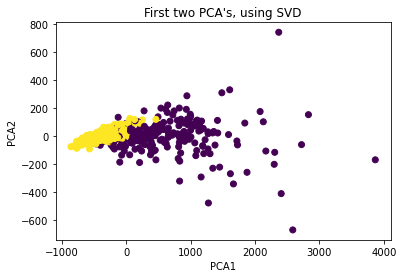

In [7]:
import matplotlib.pyplot as plt

plt.scatter(np.dot(X_center,vh[0,:]),np.dot(X_center,vh[1,:]),c=y)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('First two PCA\'s, using SVD')

Text(0.5, 1.0, "First two PCA's, using PCA built-in function")

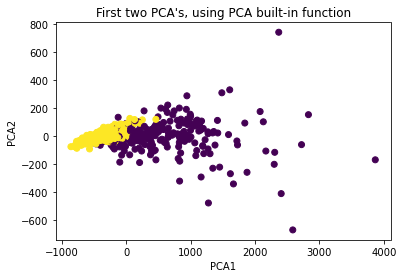

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
X = pca.transform(X)
plt.scatter(X[:,0], X[:,1],c=y)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('First two PCA\'s, using PCA built-in function')

Reference:

[A Tutorial on Principal Component Analysis, J. Shlens (2013)](
https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf)